# Machine learning

Even though Spark works with RDD and dataframe objects similarly (internal process), they have significant differences for us as analysts. RDD and dataframe have distinct methods and atributes. Based on that, We can work with our dataset using both kind of objects to use the best of each one. 
This Jupyter Notebook is just an illustration of how We can combine the best methods and attributes of both, RDD and dafaframe to build our analysis.

Let's import the csv file as RDD and store it in cache. This will give us a better performance in further uses of the RDD.

In [2]:
# Importing csv file as RDD and store it in cash
car = sc.textFile("car.csv")
car.cache()

car.csv MapPartitionsRDD[1] at textFile at <unknown>:0

In [35]:
# Top 4 rows
car.take(4)

['MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE',
 'subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195']

Transforming the RDD object using the filter() function

In [4]:
# removing the first row
rows = car.filter(lambda x: 'MAKE' not in x)
#firstRow = car.first()
#rows = car.filter(lambda x : x != firstRow)

In [5]:
rows.take(4)

['subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348']

In [6]:
# importing functions
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
import math 

In [7]:
car.take(4)

['MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE',
 'subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195']

Let's create a function to convert the columns named as doors and body  into a numeric vector and filter all non necessary columns

In [8]:
def transformToNumeric(inputStr):
    attList = inputStr.split(",")
    # Setting 1.0 if number of doors is equal to two and setting 2.0 in another case
    doors = 1.0 if attList[3] == "two" else 2.0
    #Setting 1.0 if body is equal to sedan and setting 2.0 in another case
    body = 1.0 if attList[4] == 'sedan' else 2.0
    
    # Filtering the non necessary columns
    values = Row(DOORS = doors , BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return values

We can transform the car RDD using the funcion we've just created. After that, let's  persist the automap RDD in memory using the persist method. When we do it, Spark keeps the elements in memory for much faster access the next time We query it.

In [9]:
# Transforming the car RDD
automap = rows.map(transformToNumeric)
# Let's persist the automap RDD in memory 
automap.persist()
automap.take(4)

[Row(BODY=2.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=4900.0),
 Row(BODY=2.0, DOORS=1.0, HP=48.0, MPG=47.0, RPM=5100.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=30.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=35.0, RPM=4800.0)]

In [10]:
automap.collect()

[Row(BODY=2.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=4900.0),
 Row(BODY=2.0, DOORS=1.0, HP=48.0, MPG=47.0, RPM=5100.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=30.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=35.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=60.0, MPG=38.0, RPM=5500.0),
 Row(BODY=1.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=5200.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=70.0, MPG=38.0, RPM=5400.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=31.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=58.0, MPG=49.0, RPM=4800.0),
 Row(BODY=2.0,

After all transformations, We can convet the RDD object into a Dataframe

In [11]:
# Importing ParkSession
from pyspark.sql import SparkSession

In [12]:
# Creating a Spark Session to work with dataframe
spSession = SparkSession.builder.master("local").appName("CabreirasCar-Spark").config("any.config.we.want", "some-vale").getOrCreate()

In [13]:
# Converting the RDD into a DataFrame
carDF = spSession.createDataFrame(automap)
carDF.show(5)

+----+-----+----+----+------+
|BODY|DOORS|  HP| MPG|   RPM|
+----+-----+----+----+------+
| 2.0|  1.0|69.0|31.0|4900.0|
| 2.0|  1.0|48.0|47.0|5100.0|
| 2.0|  1.0|68.0|30.0|5000.0|
| 2.0|  1.0|62.0|35.0|4800.0|
| 2.0|  1.0|68.0|37.0|5500.0|
+----+-----+----+----+------+
only showing top 5 rows



We know that iloc is a pandas atribute and it is used to select rows and columns by number, in the order that they apper in the data frame. Due to its great performance, We will convet the Spark data frame into a pandas data frame to select specific rows and columns.



In [14]:
# Converting the Spark dataframe into a Pandas DataFrame and using the method describe for statistics summary
sumStats = carDF.describe().toPandas()
# Mean of the columns body, doors, hp and MPG
meanData = sumStats.iloc[1,1:5].values.tolist()
# Standard deviation of the columns body, doors, hp and MPG
stdData = sumStats.iloc[2,1:5].values.tolist()

In [15]:
sumStats

,summary,BODY,DOORS,HP,MPG,RPM
0,count,197,197,197,197,197
1,mean,1.532994923857868,1.5685279187817258,103.60406091370558,25.15228426395939,5118.0203045685275
2,stddev,0.5001812579359883,0.49654352778167493,37.639205349518356,6.437862917085915,481.03591405011446
3,min,1.0,1.0,48.0,13.0,4150.0
4,max,2.0,2.0,262.0,49.0,6600.0


In [16]:
# Mean
meanData

['1.532994923857868',
 '1.5685279187817258',
 '103.60406091370558',
 '25.15228426395939']

In [17]:
# Standard deviation
stdData

['0.5001812579359883',
 '0.49654352778167493',
 '37.639205349518356',
 '6.437862917085915']

In [18]:
# Setting the mean and the std as a broadcast variable 
bcMean = sc.broadcast(meanData)
bcStd = sc.broadcast(stdData)

In [19]:
# Normalizing the data
def centerAndScale(inRow):
    global bcMean
    global bcStd
    
    meanArray = bcMean.value
    stdArray = bcStd.value
    
    retArray = list()
    for i in range(len(meanArray)):
        retArray.append((float(inRow[i]) - float(meanArray[i])) / float (stdArray[i]))
    
    # Setting retArray as a dense vector
    return Vectors.dense(retArray)
    

To apply the function We've just created, We need to convert it into a RDD and use the map funcion  

In [20]:
# Converting carDF into a RDD
ScaledCar = carDF.rdd.map(centerAndScale)
ScaledCar.take(2)


[DenseVector([0.9337, -1.145, -0.9194, 0.9083]),
 DenseVector([0.9337, -1.145, -1.4773, 3.3936])]

In [21]:
# Features
autoRows = ScaledCar.map(lambda f: Row(features = f))
# Create Dataframa
autoDF = spSession.createDataFrame(autoRows)
autoDF.select("features").head(5)

[Row(features=DenseVector([0.9337, -1.145, -0.9194, 0.9083])),
 Row(features=DenseVector([0.9337, -1.145, -1.4773, 3.3936])),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 0.753])),
 Row(features=DenseVector([0.9337, -1.145, -1.1053, 1.5297])),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 1.8403]))]

In [22]:
# k-means Algorithm
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = 3, seed = 1)
model = kmeans.fit(autoDF)
predictions = model.transform(autoDF)
predictions.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[-1.0656035495158...|         0|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[-1.0656035495158...|         0|
+--------------------+----------+
only showing top 20 rows



In [28]:
predictions.head(4)

[Row(features=DenseVector([0.9337, -1.145, -0.9194, 0.9083]), prediction=1),
 Row(features=DenseVector([0.9337, -1.145, -1.4773, 3.3936]), prediction=1),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 0.753]), prediction=1),
 Row(features=DenseVector([0.9337, -1.145, -1.1053, 1.5297]), prediction=1)]

In [29]:
# import libraries 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [30]:
def data(instr):
    return (instr["prediction"], instr["features"][0], instr["features"][1], instr["features"][2], instr["features"][3])

In [31]:
# preparing data 
unstripped = predictions.rdd.map(data)
predList = unstripped.collect()
predPD = pd.DataFrame(predList)

In [45]:
predPD.head()

,0,1,2,3,4
0,1,0.933672,-1.144971,-0.919362,0.908332
1,1,0.933672,-1.144971,-1.477291,3.393629
2,1,0.933672,-1.144971,-0.945930,0.753001
3,1,0.933672,-1.144971,-1.105338,1.529656
4,1,0.933672,-1.144971,-0.945930,1.840318


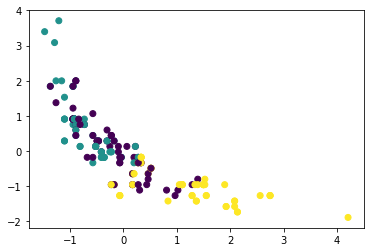

In [32]:
# plot
plt.cla()
plt.scatter(predPD[3], predPD[4], c = predPD[0])

As can be seen, both RDD and DataFrame objects should be "combined" in order to strength our analysis. These two kind of objects give us the power we need to process our data in different manner and consequently build excellent analysis. 